In [1]:
from google.colab import files
uploaded = files.upload()

Saving mtsamples.csv to mtsamples.csv


**PART 1: LOADING THE DATSET**

In [3]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('mtsamples.csv')


In [6]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Load the dataset
df = pd.read_csv('mtsamples.csv')

# Function for preprocessing a single document
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization (using spaCy)
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Join tokens back into a single string
    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text

# Apply preprocessing to the 'transcription' column
df['preprocessed_transcription'] = df['transcription'].astype(str).apply(preprocess_text)

# Display comparison of original and preprocessed text
print("Original vs. Preprocessed Text (First 5 Rows):\n")
for i in range(5):
    print("Original:", df['transcription'][i])
    print("Preprocessed:", df['preprocessed_transcription'][i])
    print("---")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original vs. Preprocessed Text (First 5 Rows):

Original: SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was 

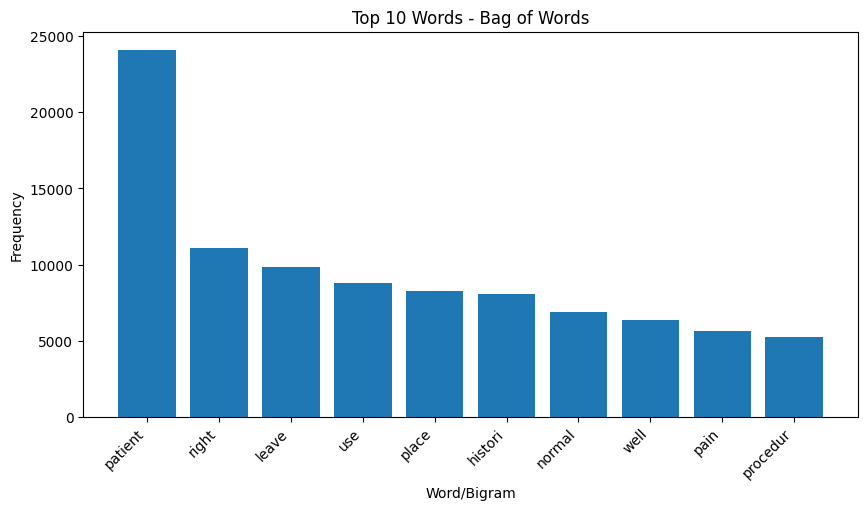

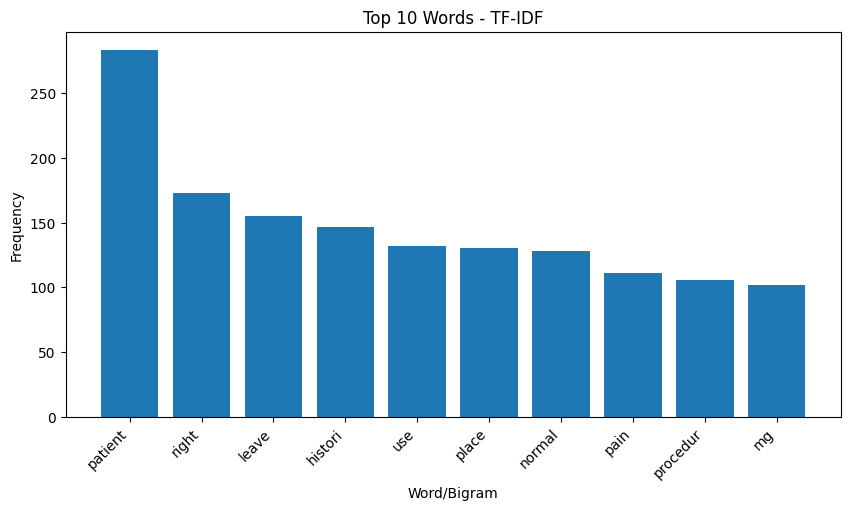

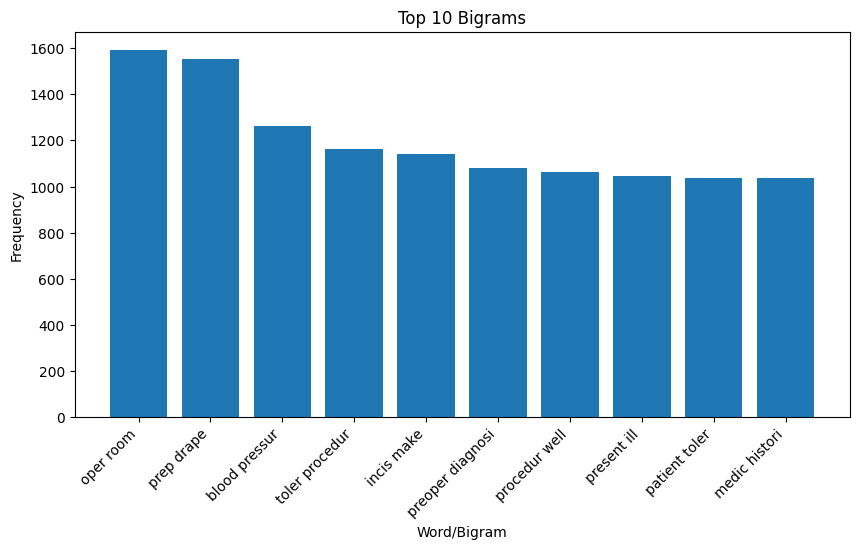

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and fit CountVectorizer (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['preprocessed_transcription'])

# Initialize and fit TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['preprocessed_transcription'])

# Initialize and fit CountVectorizer for bigrams
vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))  # Extract bigrams
X_bigrams = vectorizer_bigrams.fit_transform(df['preprocessed_transcription'])

# Function to get top N words and their frequencies
def get_top_n_words(feature_vector, vectorizer, n=10):
    feature_names = vectorizer.get_feature_names_out()
    feature_counts = feature_vector.toarray().sum(axis=0)
    top_words = pd.DataFrame(
        list(zip(feature_names, feature_counts)),
        columns=['word', 'frequency']
    ).nlargest(n, 'frequency')
    return top_words

# Get top 10 words for each representation
top_bow_words = get_top_n_words(X_bow, vectorizer_bow)
top_tfidf_words = get_top_n_words(X_tfidf, vectorizer_tfidf)
top_bigrams = get_top_n_words(X_bigrams, vectorizer_bigrams)

# Create bar charts for top words (using Matplotlib)
def plot_bar_chart(data, title):
    plt.figure(figsize=(10, 5))
    plt.bar(data['word'], data['frequency'])
    plt.xlabel("Word/Bigram")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_bar_chart(top_bow_words, "Top 10 Words - Bag of Words")
plot_bar_chart(top_tfidf_words, "Top 10 Words - TF-IDF")
plot_bar_chart(top_bigrams, "Top 10 Bigrams")


In [10]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Function to get word embeddings from a pre-trained model
def get_embeddings(model, words):
    valid_words = []
    embeddings = []
    for word in words:
        if word in model.key_to_index:
            valid_words.append(word)
            embeddings.append(model[word])
    return valid_words, np.array(embeddings)

# Function to visualize embeddings using t-SNE
def visualize_embeddings(embeddings, words, title):
    perplexity = min(len(embeddings) - 1, 30)  # Adjust perplexity based on the number of samples
    tsne = TSNE(n_components=2, random_state=0, n_iter=300, perplexity=perplexity)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(14, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(title)
    plt.show()




In [11]:
# Load pre-trained models
word2vec_model = api.load("word2vec-google-news-300")
glove_model = api.load("glove-wiki-gigaword-300")
fasttext_model = api.load("fasttext-wiki-news-subwords-300")


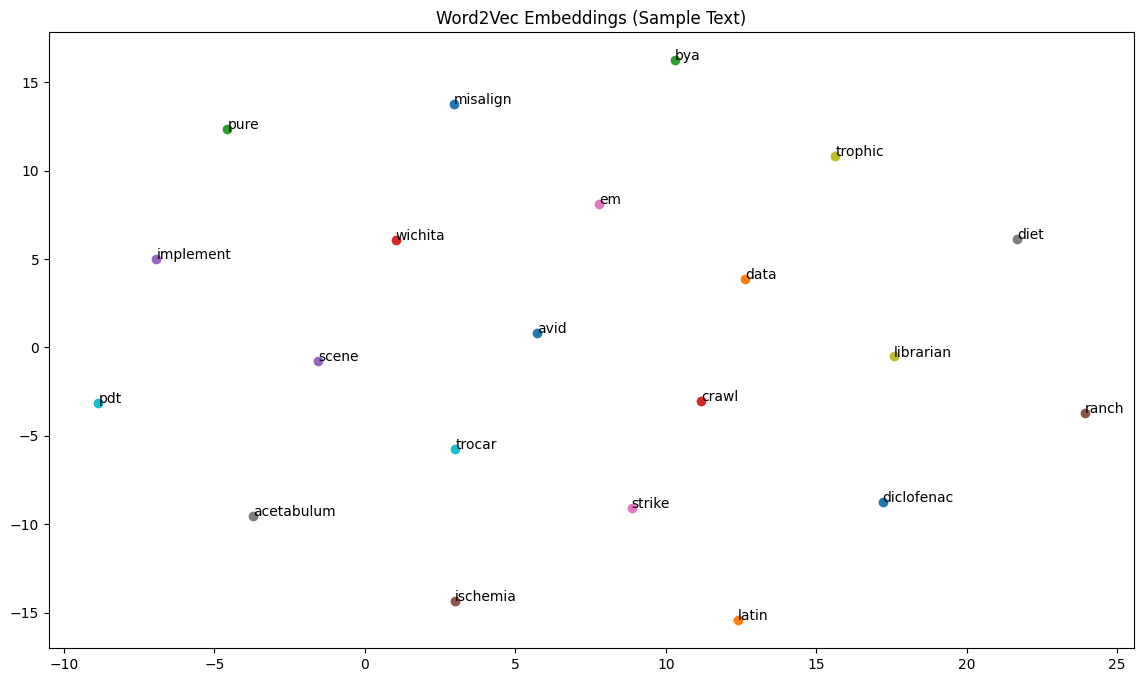

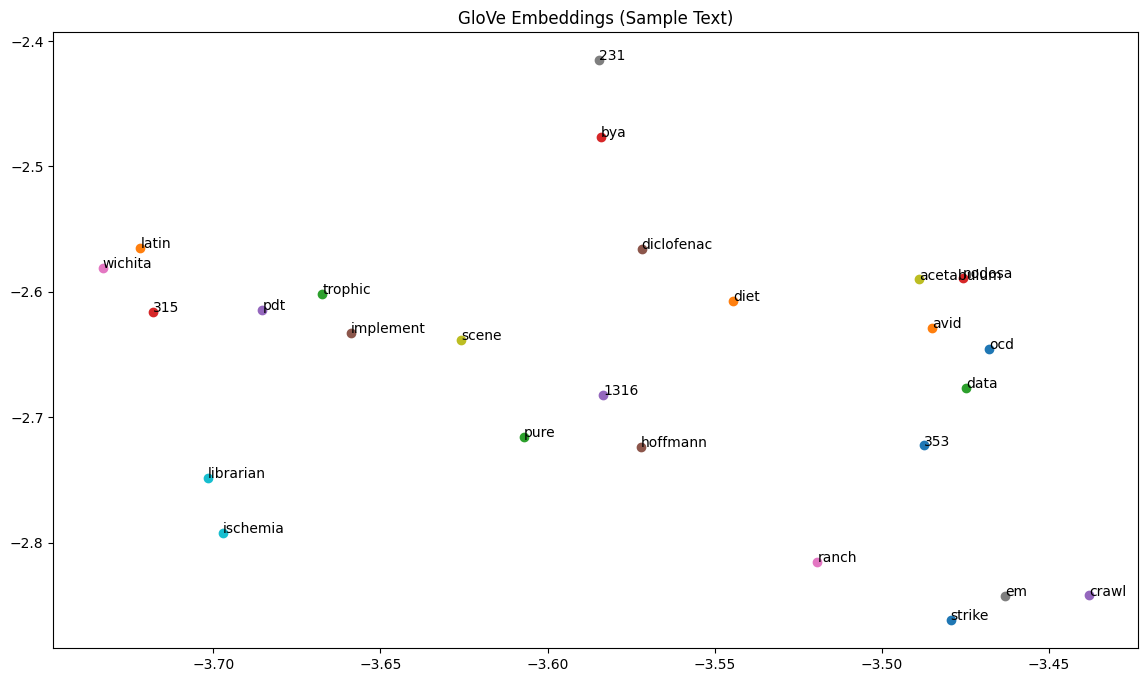

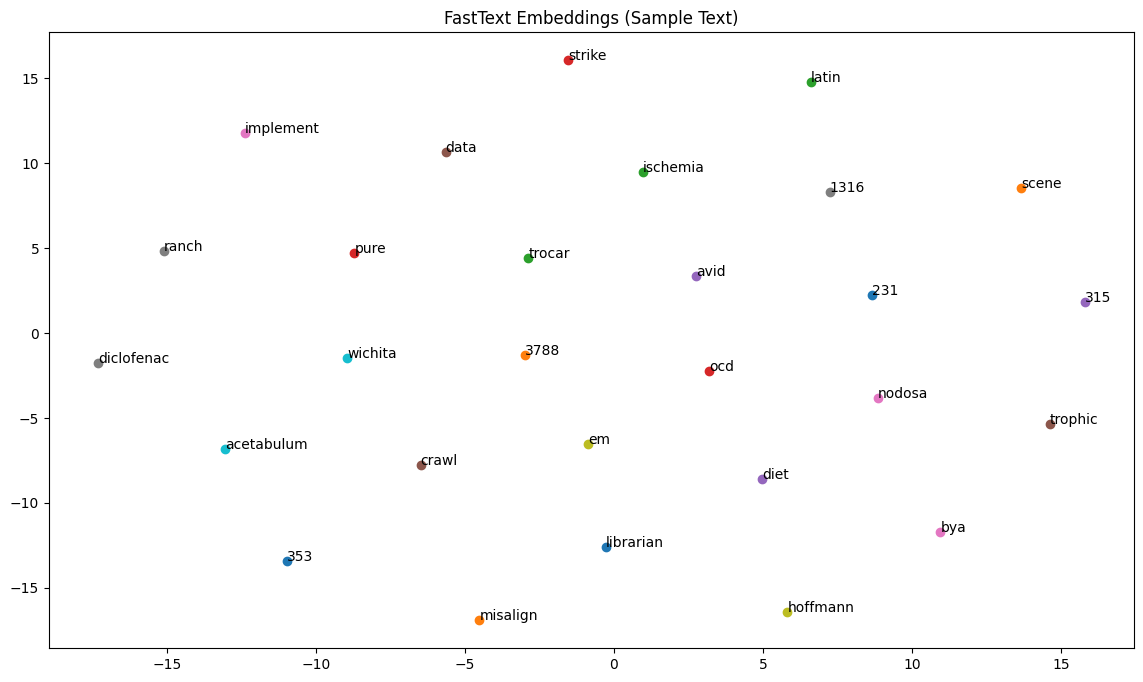

In [12]:
# Sample words from the dataset
all_words = ' '.join(df['preprocessed_transcription']).split()
sample_words = list(set(all_words))[:100]  # Sample first 100 unique words for visualization

# Get embeddings for the sample words
valid_sample_words_w2v, sample_word2vec_embeddings = get_embeddings(word2vec_model, sample_words)
valid_sample_words_glove, sample_glove_embeddings = get_embeddings(glove_model, sample_words)
valid_sample_words_ft, sample_fasttext_embeddings = get_embeddings(fasttext_model, sample_words)

# Visualize embeddings
visualize_embeddings(sample_word2vec_embeddings, valid_sample_words_w2v, "Word2Vec Embeddings (Sample Text)")
visualize_embeddings(sample_glove_embeddings, valid_sample_words_glove, "GloVe Embeddings (Sample Text)")
visualize_embeddings(sample_fasttext_embeddings, valid_sample_words_ft, "FastText Embeddings (Sample Text)")


In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example of preprocessing steps
texts = df['description']  # or another relevant column
labels = df['medical_specialty']  # or another relevant column

# Tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
maxlen = 100
data = pad_sequences(sequences, maxlen=maxlen)

# Encode labels if necessary
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
labels = np.asarray(encoded_labels)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GRU Model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=20000, output_dim=128, input_length=maxlen))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train LSTM
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Train GRU
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
125/125 [==============================] - 46s 292ms/step - loss: -390.5696 - accuracy: 0.0015 - val_loss: -638.7126 - val_accuracy: 0.0020
Epoch 2/10
125/125 [==============================] - 36s 286ms/step - loss: -806.0449 - accuracy: 0.0015 - val_loss: -1008.7216 - val_accuracy: 0.0020
Epoch 3/10
125/125 [==============================] - 35s 282ms/step - loss: -1160.6842 - accuracy: 0.0015 - val_loss: -1365.5997 - val_accuracy: 0.0020
Epoch 4/10
125/125 [==============================] - 36s 287ms/step - loss: -1506.9587 - accuracy: 0.0015 - val_loss: -1716.4731 - val_accuracy: 0.0020
Epoch 5/10
125/125 [==============================] - 37s 295ms/step - loss: -1849.6039 - accuracy: 0.0015 - val_loss: -2065.0894 - val_accuracy: 0.0020
Epoch 6/10
125/125 [==============================] - 38s 302ms/step - loss: -2190.2549 - accuracy: 0.0015 - val_loss: -2411.9397 - val_accuracy: 0.0020
Epoch 7/10
125/125 [==============================] - 37s 298ms/step - loss: -2529.45

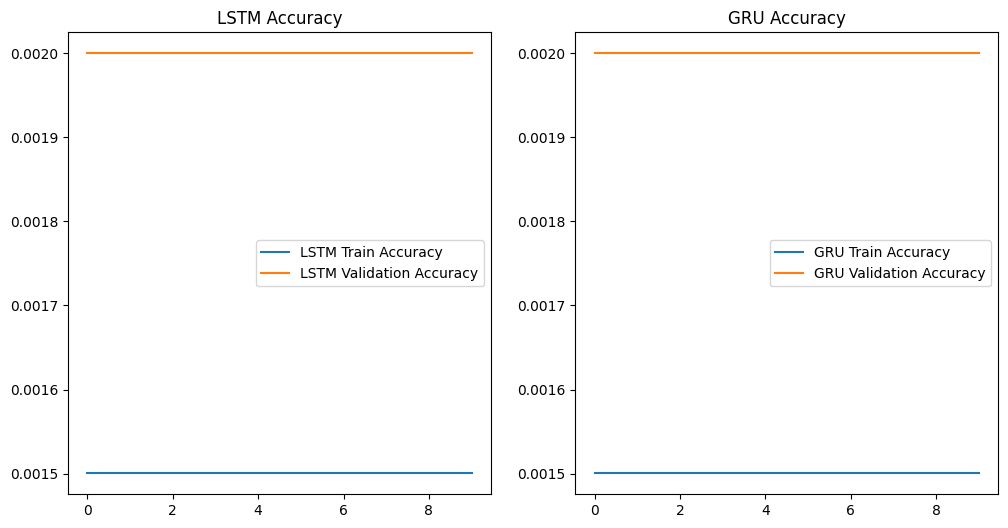

In [16]:
import matplotlib.pyplot as plt

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))

# LSTM
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Accuracy')
plt.legend()

# GRU
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('GRU Accuracy')
plt.legend()

plt.show()

In [17]:
# Assuming you have 'top_bow_words', 'top_tfidf_words', 'top_bigrams' from the previous code

print("Top 10 words (BoW):\n", top_bow_words)
print("\nTop 10 words (TF-IDF):\n", top_tfidf_words)
print("\nTop 10 bigrams:\n", top_bigrams)


Top 10 words (BoW):
            word  frequency
26590   patient      24093
30399     right      11101
20752     leave       9864
36389       use       8807
27299     place       8266
17791   histori       8088
24775    normal       6864
37282      well       6376
26102      pain       5643
28415  procedur       5248

Top 10 words (TF-IDF):
            word   frequency
26590   patient  283.341594
30399     right  172.620944
20752     leave  154.913019
17791   histori  146.988822
36389       use  131.932672
27299     place  130.727649
24775    normal  128.254193
26102      pain  111.439145
28415  procedur  105.684185
22589        mg  101.631459

Top 10 bigrams:
                     word  frequency
202824         oper room       1592
226426        prep drape       1553
45310      blood pressur       1264
296669    toler procedur       1161
145514        incis make       1143
226298  preoper diagnosi       1080
230965     procedur well       1065
227081       present ill       1044
212223 

32/32 [==============================] - 2s 37ms/step


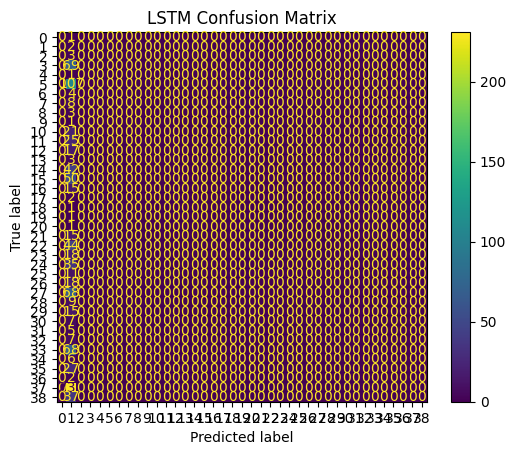

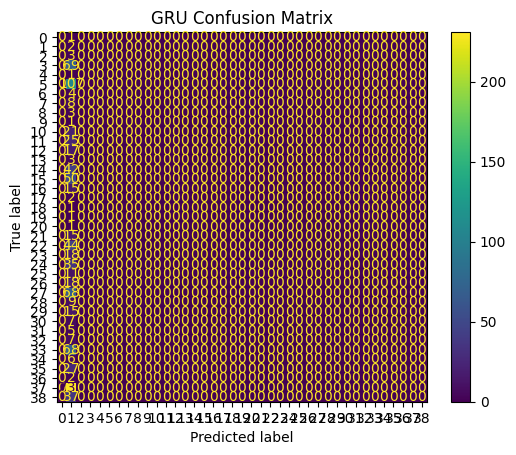

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have made predictions and stored them in these variables:
y_pred_lstm = lstm_model.predict(X_val)
y_pred_gru = gru_model.predict(X_val)

# Assuming your labels are binary (0 or 1), you might need to adjust the threshold:
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

# Plot confusion matrix for LSTM
cm_lstm = confusion_matrix(y_val, y_pred_lstm_binary)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm)
disp_lstm.plot()
plt.title('LSTM Confusion Matrix')
plt.show()

# Plot confusion matrix for GRU
cm_gru = confusion_matrix(y_val, y_pred_gru_binary)
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru)
disp_gru.plot()
plt.title('GRU Confusion Matrix')
plt.show()
